In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/ybifoundation/Dataset/main/Bike%20Prices.csv')
print(df.head())
print(df.info())
df = df.dropna()
print(df.describe())

   Brand               Model  Selling_Price  Year Seller_Type      Owner  \
0    TVS          TVS XL 100          30000  2017  Individual  1st owner   
1  Bajaj       Bajaj  ct 100          18000  2017  Individual  1st owner   
2     Yo            Yo Style          20000  2011  Individual  1st owner   
3  Bajaj  Bajaj Discover 100          25000  2010  Individual  1st owner   
4  Bajaj  Bajaj Discover 100          24999  2012  Individual  2nd owner   

   KM_Driven  Ex_Showroom_Price  
0       8000            30490.0  
1      35000            32000.0  
2      10000            37675.0  
3      43000            42859.0  
4      35000            42859.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   i

In [23]:
print(df[['Brand']].value_counts())
print(df[['Model']].value_counts())
print(df[['Seller_Type']].value_counts())
print(df[['Owner']].value_counts())

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64
Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64
Seller_Type
Individual     623
Dealer           3
dtype: int64
Owner    
1st owner

In [24]:
print(df.columns)
print(df.shape)

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')
(626, 8)


In [25]:
df.replace({'Seller_Type':{'Individual':0, 'Dealer':1}}, inplace = True)
df.replace({'Owner':{'1st Owner':0, '2nd Owner':1, '3rd Owner':2, '4th Owner':3}}, inplace = True)

In [26]:
y = df['Selling_Price']
print(y.shape)
print(y)

(626,)
0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64


In [27]:
X = df[['Year', 'Seller_Type','KM_Driven', 'Ex_Showroom_Price']]
print(X.shape)
print(X)

(626, 4)
     Year  Seller_Type  KM_Driven  Ex_Showroom_Price
0    2017            0       8000            30490.0
1    2017            0      35000            32000.0
2    2011            0      10000            37675.0
3    2010            0      43000            42859.0
4    2012            0      35000            42859.0
..    ...          ...        ...                ...
621  2014            0       6500           534000.0
622  2011            0      12000           589000.0
623  2017            0      13600           599000.0
624  2019            0       2800           752020.0
625  2013            0      12000          1278000.0

[626 rows x 4 columns]


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 19529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((438, 4), (188, 4), (438,), (188,))

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)
print(y_pred.shape)
print(y_pred)

(188,)
[ 8.91548810e+04  1.65183158e+05  9.20455762e+03  4.98010421e+04
  1.61508108e+04  2.30320221e+04  2.24756989e+05  1.83483662e+04
  1.58834039e+05  5.52410203e+04  1.17263718e+05  4.41806503e+04
  4.54775910e+04  5.22927915e+04  2.87966616e+04  4.55758717e+04
 -1.58469198e+04  3.35764831e+04  7.44343222e+04  7.68676333e+04
  1.29970553e+04  4.73859385e+04  1.58860185e+05  4.45976240e+04
  9.22198807e+03  6.21218351e+04  1.11633913e+05  3.15599289e+04
  1.89123932e+04  2.04176460e+05  9.05820113e+04  2.25944072e+05
  2.22620325e+04  3.41536434e+04  4.01828223e+04  5.92098806e+04
  1.81345820e+04  6.09533699e+04  3.35538165e+04  1.65229349e+05
  9.73166515e+04  5.33447093e+04  1.79245718e+05  1.75307391e+04
  1.90053556e+04 -2.08715963e+04  9.11993422e+04 -1.13992183e+04
  4.91421552e+04  7.73881148e+04  9.73113584e+04  4.94170574e+04
  2.84769337e+04  6.73060516e+04  3.84743303e+04  1.82263530e+04
  6.73351023e+04  1.72288088e+04  6.71623214e+04  2.92250025e+04
  4.77354489e+04  

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

940915245.5768065
19985.811793835976
0.46331748483252555


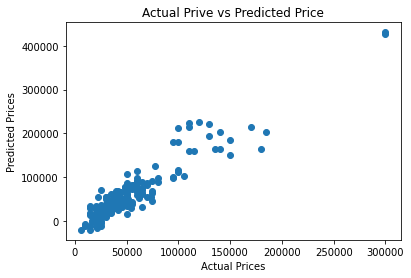

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prive vs Predicted Price')
plt.show()

In [34]:
df_new = df.sample(1)
print(df_new)
print(df_new.shape)

     Brand                                       Model  Selling_Price  Year  \
613  Royal  Royal Enfield Continental GT [2013 - 2018]         110000  2014   

     Seller_Type      Owner  KM_Driven  Ex_Showroom_Price  
613            0  1st owner      12077           208902.0  
(1, 8)


In [35]:
X_new = df_new[['Year', 'Seller_Type','KM_Driven', 'Ex_Showroom_Price' ]]
X_new = sc.fit_transform(X_new)
y_pred_new = lr.predict(X_new)
y_pred_new

array([62062.78310502])